# Final Project Big Ideas
### What is the best Neightborhood in Pittsburgh to be homeless in?

**Introduction** : To determine the best neighborhood for individuals experiencing homelessness, we embarked on a thorough analysis encompassing key factors such as housing costs, crime rates, and population density. Our objective was to provide a perspective on the livability and safety of neighborhoods for those facing homelessness.

**Metric Description** :The metric used to evaluate the suitability of neighborhoods for individuals experiencing homelessness is a composite index based on three primary features:

**Housing Affordability** : This feature measures the affordability of housing within a neighborhood, specifically focusing on the percentage of housing units with a cost lower than $10,000. This indicator is crucial for identifying areas where housing may be more accessible to individuals with limited financial resources.

**Crime Rate** : The crime rate feature assesses the safety of a neighborhood by considering various types of crimes, including but not limited to property crimes, violent crimes, and public order offenses. Lower crime rates contribute positively to the overall livability and security of a neighborhood.

**Population Density** : Population density is an essential feature in understanding the availability of resources and social services for homeless individuals. It is calculated as the number of inhabitants per square mile, providing insights into the level of community support and available infrastructure.

---

## Housing Affordability

In [2]:
import pandas as pd
import geopandas as geo
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
url = "https://data.wprdc.org/dataset/5b18c198-474c-4723-b735-cc5220ad43cc/resource/13982f58-e618-400c-8f69-6a32dbd7c68f/download/value.csv"
df = pd.read_csv(url)
newDf = df[df['Estimate; Total: - Less than $10,000'] > 0]
decendingDf = newDf.sort_values(by='Estimate; Total: - Less than $10,000', ascending=False)
decendingDf[['Neighborhood', 'Estimate; Total:', 'Estimate; Total: - Less than $10,000', 'Margin of Error; Total: - Less than $10,000']].head(25)

,Neighborhood,Estimate; Total:,"Estimate; Total: - Less than $10,000","Margin of Error; Total: - Less than $10,000"
34,Garfield,628.0,54.0,28.407745
13,Brookline,4245.0,47.0,50.259327
2,Allentown,538.0,45.0,33.734256
77,Squirrel Hill South,3152.0,36.0,47.791213
51,Morningside,954.0,34.0,30.692019
73,South Side Slopes,1053.0,31.0,33.896903
89,Westwood,973.0,29.0,25.495098
53,Mount Washington,1828.0,27.0,31.128765
41,Homewood South,396.0,27.0,26.776856
5,Banksville,985.0,26.0,35.510562


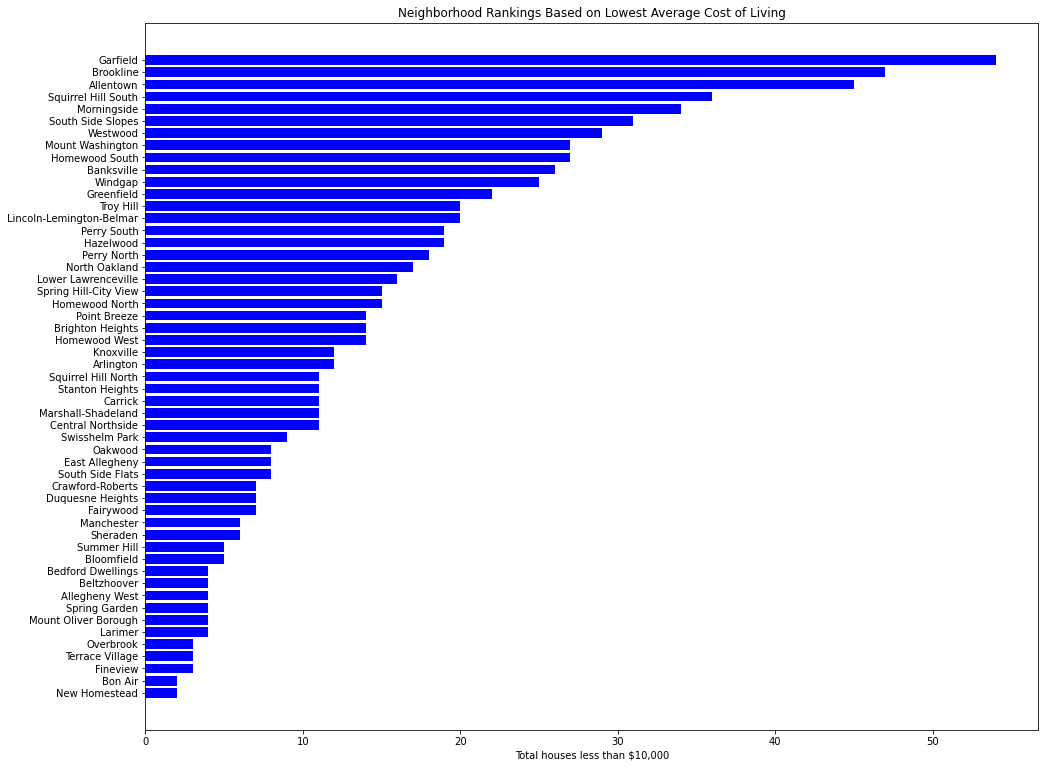

In [4]:
plt.figure(figsize=(16, 13))
plt.barh(decendingDf['Neighborhood'], decendingDf['Estimate; Total: - Less than $10,000'], color='blue')
plt.xlabel('Total houses less than $10,000')
plt.title('Neighborhood Rankings Based on Lowest Average Cost of Living')
plt.gca().invert_yaxis() 
plt.show()

---

## Crime Rate

In [6]:
file_path = "https://data.wprdc.org/dataset/9c7da6cf-7492-4ffc-865d-10945a37232a/resource/967cad5c-ea8f-4558-9dc9-8d3f7a3b046c/download/crime-rate.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')

df = df.dropna() # Drop rows with missing values
df.head(100) 

,neighborhood,number_major_crimes_1973,neighborhood_crime_rate_1973,number_major_crimes_1974,neighborhood_crime_rate_1974,number_major_crimes_1975,neighborhood_crime_rate_1975
0,Westwood,65,0.019,46,0.014,78,0.023
1,31st ward,125,0.017,85,0.012,92,0.013
2,Arlington,243,0.037,177,0.027,184,0.028
3,Allegheny Center,277,0.151,407,0.222,571,0.312
4,Allegheny West,154,0.147,197,0.188,227,0.217
...,...,...,...,...,...,...,...
64,Swisshelm Heights,18,0.009,14,0.007,16,0.008
65,Troy Hill,75,0.019,55,0.014,61,0.016
66,Uptown,323,0.099,382,0.117,409,0.126
67,West End,70,0.049,70,0.049,60,0.040


In [7]:
file_path = "https://data.wprdc.org/dataset/9c7da6cf-7492-4ffc-865d-10945a37232a/resource/967cad5c-ea8f-4558-9dc9-8d3f7a3b046c/download/crime-rate.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1') #DataFrame

df = df.dropna()

df['average_crime_rate'] = df[['neighborhood_crime_rate_1973', 'neighborhood_crime_rate_1974', 'neighborhood_crime_rate_1975']].mean(axis=1)
ranked_df = df.sort_values(by='average_crime_rate')

print(ranked_df[['neighborhood', 'average_crime_rate']])

                    neighborhood  average_crime_rate
31            Glen Hazel Heights            0.000000
64             Swisshelm Heights            0.008000
35         Ivory Avenue District            0.009000
50                       Oakwood            0.012333
17               Crafton Heights            0.012333
..                           ...                 ...
4                 Allegheny West            0.184000
3               Allegheny Center            0.228333
63                Strip District            0.504000
18                      Downtown            0.652667
44  North Side: North Shore Area            0.692333

[69 rows x 2 columns]


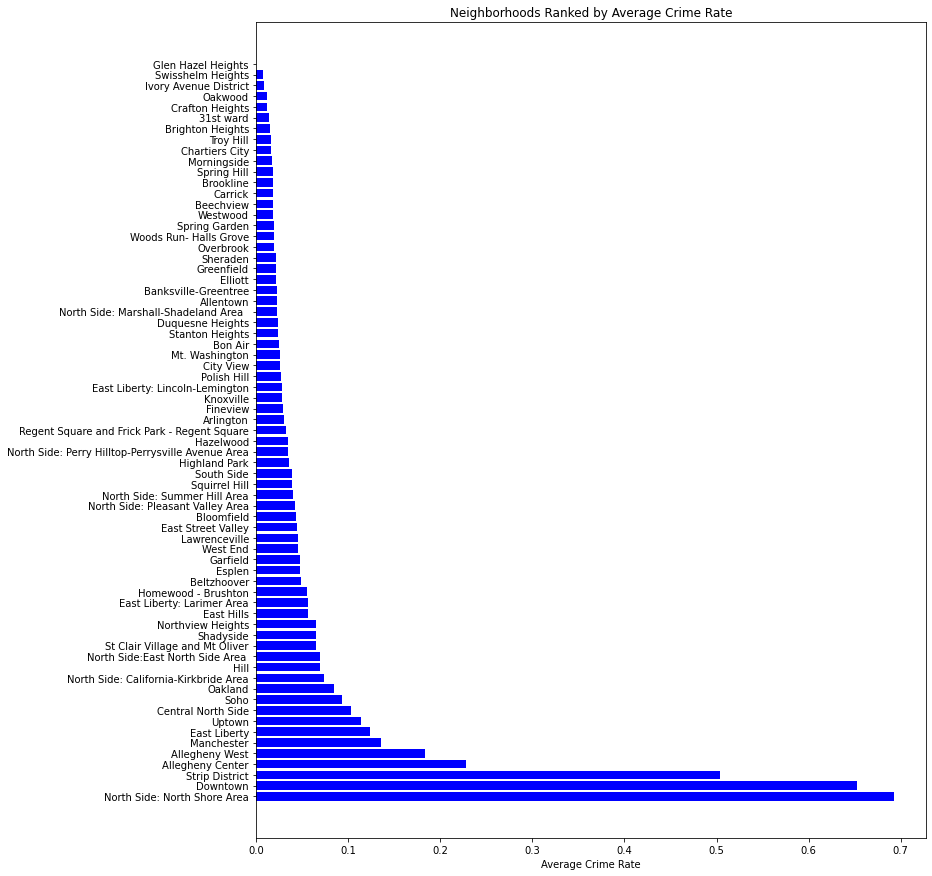

In [8]:
plt.figure(figsize=(12, 15))
plt.barh(ranked_df['neighborhood'], ranked_df['average_crime_rate'], color='green')
plt.xlabel('Average Crime Rate')
plt.title('Neighborhoods Ranked by Average Crime Rate')
plt.gca().invert_yaxis()
plt.show()

In [9]:
url = "https://data.wprdc.org/dataset/5b18c198-474c-4723-b735-cc5220ad43cc/resource/13982f58-e618-400c-8f69-6a32dbd7c68f/download/value.csv"
df = pd.read_csv(url)
newDf = df[df['Estimate; Total: - Less than $10,000'] > 0]
newDf.head(53)

,Neighborhood,Id,Estimate; Total:,Margin of Error; Total:,"Estimate; Total: - Less than $10,000","Margin of Error; Total: - Less than $10,000","Estimate; Total: - $10,000 to $14,999","Margin of Error; Total: - $10,000 to $14,999","Estimate; Total: - $15,000 to $19,999","Margin of Error; Total: - $15,000 to $19,999",...,"Estimate; Total: - $500,000 to $749,999","Margin of Error; Total: - $500,000 to $749,999","Estimate; Total: - $750,000 to $999,999","Margin of Error; Total: - $750,000 to $999,999","Estimate; Total: - $1,000,000 to $1,499,999","Margin of Error; Total: - $1,000,000 to $1,499,999","Estimate; Total: - $1,500,000 to $1,999,999","Margin of Error; Total: - $1,500,000 to $1,999,999","Estimate; Total: - $2,000,000 or more","Margin of Error; Total: - $2,000,000 or more"
1,Allegheny West,2,69.0,31.000000,4.0,7.000000,0.0,10.000000,0.0,10.000000,...,0.0,10.000000,0.0,10.000000,11.0,17.000000,0.0,10.000000,0.0,10.000000
2,Allentown,3,538.0,112.769677,45.0,33.734256,19.0,21.118712,22.0,26.153394,...,6.0,16.763055,0.0,17.320508,0.0,17.320508,0.0,17.320508,0.0,17.320508
3,Arlington,4,492.0,84.433406,12.0,16.186414,29.0,27.513633,5.0,16.248077,...,7.0,17.916473,0.0,17.320508,3.0,15.779734,0.0,17.320508,0.0,17.320508
5,Banksville,6,985.0,139.728308,26.0,35.510562,0.0,20.000000,0.0,20.000000,...,0.0,20.000000,0.0,20.000000,17.0,31.240999,0.0,20.000000,0.0,20.000000
6,Bedford Dwellings,7,48.0,31.000000,4.0,6.000000,5.0,7.000000,8.0,11.000000,...,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000
8,Beltzhoover,9,556.0,129.988461,4.0,18.330303,19.0,25.495098,45.0,42.261093,...,0.0,20.000000,0.0,20.000000,0.0,20.000000,0.0,20.000000,0.0,20.000000
9,Bloomfield,10,1688.0,134.014925,5.0,30.805844,23.0,35.791060,5.0,31.048349,...,26.0,36.207734,3.0,30.413813,4.0,31.048349,0.0,31.622777,0.0,31.622777
11,Bon Air,12,305.0,62.000000,2.0,4.000000,7.0,11.000000,0.0,10.000000,...,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000
12,Brighton Heights,13,2206.0,159.125736,14.0,33.600595,6.0,25.768197,0.0,26.457513,...,0.0,26.457513,18.0,29.478806,0.0,26.457513,0.0,26.457513,0.0,26.457513
13,Brookline,14,4245.0,300.141633,47.0,50.259327,47.0,49.689033,6.0,38.483763,...,10.0,41.521079,23.0,53.329167,0.0,38.729833,0.0,38.729833,8.0,39.293765


## Population Density 

---